<a href="https://colab.research.google.com/github/luizasampaio-s/todo8/blob/main/to_do_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
# Importando arquivo .csv
milsa = pd.read_csv('http://www.leg.ufpr.br/~fernandomayer/data/milsa.csv')
milsa.head()

,Funcionario,Est.civil,Inst,Filhos,Salario,Anos,Meses,Regiao
0,1,solteiro,1o Grau,NaN,4.00,26,3,interior
1,2,casado,1o Grau,1.0,4.56,32,10,capital
2,3,casado,1o Grau,2.0,5.25,36,5,capital
3,4,solteiro,2o Grau,NaN,5.73,20,10,outro
4,5,solteiro,1o Grau,NaN,6.26,40,7,outro


In [3]:
# Colocando funcionário como index.
milsa.set_index('Funcionario', inplace = True)
milsa.head()

,Est.civil,Inst,Filhos,Salario,Anos,Meses,Regiao
Funcionario,,,,,,,
1,solteiro,1o Grau,NaN,4.00,26,3,interior
2,casado,1o Grau,1.0,4.56,32,10,capital
3,casado,1o Grau,2.0,5.25,36,5,capital
4,solteiro,2o Grau,NaN,5.73,20,10,outro
5,solteiro,1o Grau,NaN,6.26,40,7,outro


In [4]:
# Removendo a coluna meses.
milsa.drop(columns=['Meses'], inplace = True)
milsa.head()

,Est.civil,Inst,Filhos,Salario,Anos,Regiao
Funcionario,,,,,,
1,solteiro,1o Grau,NaN,4.00,26,interior
2,casado,1o Grau,1.0,4.56,32,capital
3,casado,1o Grau,2.0,5.25,36,capital
4,solteiro,2o Grau,NaN,5.73,20,outro
5,solteiro,1o Grau,NaN,6.26,40,outro


In [5]:
# Trocando os valores nulos da coluna 'Filhos' por 0.
milsa['Filhos'].fillna(0, inplace = True)
milsa.head()

,Est.civil,Inst,Filhos,Salario,Anos,Regiao
Funcionario,,,,,,
1,solteiro,1o Grau,0.0,4.00,26,interior
2,casado,1o Grau,1.0,4.56,32,capital
3,casado,1o Grau,2.0,5.25,36,capital
4,solteiro,2o Grau,0.0,5.73,20,outro
5,solteiro,1o Grau,0.0,6.26,40,outro


In [6]:
# Idade média dos funcionarios
milsa['Anos'].mean().round()

35.0

In [7]:
# Dos funcionários que têm filhos, qual o número mais comum?
milsa_qtd_filhos = milsa['Filhos'].value_counts()
milsa_qtd_filhos

0.0    20
2.0     7
1.0     5
3.0     3
5.0     1
Name: Filhos, dtype: int64

In [8]:
# Média e mediana dos salários.
mean_median_dict = {'Média': milsa['Salario'].mean() , 
                    'Mediana': milsa['Salario'].median()}

mean_median_sal = pd.DataFrame (mean_median_dict, index =[1])
mean_median_sal.round()

,Média,Mediana
1,11.0,10.0


In [9]:
# Quais são os tipos de instrução existentes?
milsa['Inst'].unique()

array(['1o Grau', '2o Grau', 'Superior'], dtype=object)

In [10]:
# Existe relação entre o grau de instrução e o salário? 
milsa_1grau = milsa.query('Inst == "1o Grau"')
milsa_1grau['Salario'].mean().round()

8.0

In [11]:
milsa_2grau = milsa.query('Inst == "2o Grau"')
milsa_2grau['Salario'].mean().round()

12.0

In [12]:
milsa_superior = milsa.query('Inst == "Superior"')
milsa_superior['Salario'].mean().round()

16.0

In [14]:
import matplotlib.pyplot as plt

In [13]:
milsa_mean_inst = milsa.groupby('Inst')['Salario'].mean().round()

df_inst_salario = pd.DataFrame(milsa_mean_inst)
df_inst_salario.index.name = 'Grau de instrução'
df_inst_salario

,Salario
Grau de instrução,
1o Grau,8.0
2o Grau,12.0
Superior,16.0


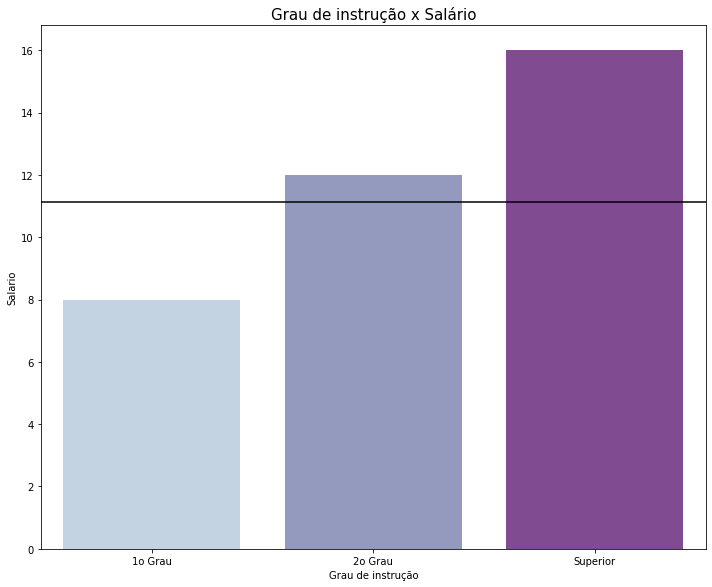

In [113]:
#criando uma figure, axes
fig, ax = plt.subplots(figsize=(10,8))
#criando o gráfico de barras 
sns.barplot(x= df_inst_salario.index , y= df_inst_salario ['Salario'], ax=ax, data=df_inst_salario,palette='BuPu')
ax.axhline (milsa['Salario'].mean(),1,0, color = 'black')
#otimizar espaço da figure
fig.tight_layout();
#adicionando título
ax.set_title("Grau de instrução x Salário", fontdict={'fontsize':15});

In [104]:
# Regiao x salário
milsa_mean_reg = milsa.groupby('Regiao')['Salario'].mean().round()
df_milsa_mean_reg = pd.DataFrame(milsa_mean_reg)
df_milsa_mean_reg.reset_index(inplace = True)
df_milsa_mean_reg

,Regiao,Salario
0,capital,11.0
1,interior,12.0
2,outro,10.0


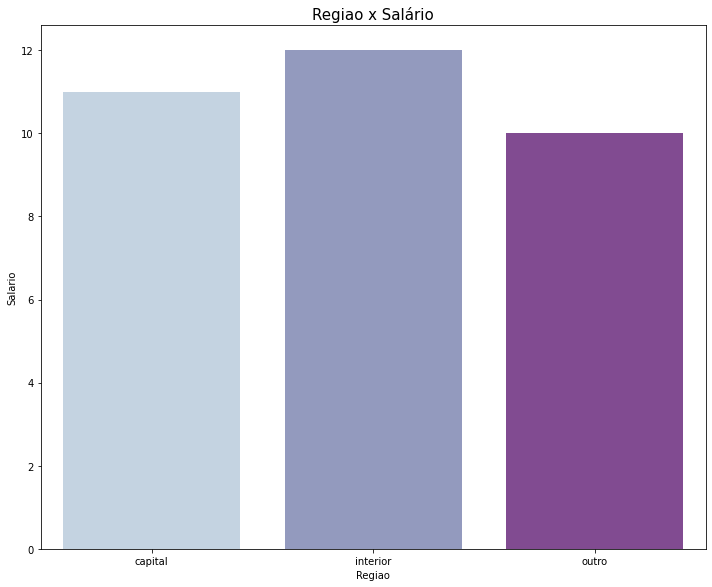

In [112]:
#criando uma figure, axes
fig, ax = plt.subplots(figsize=(10,8))
#criando o gráfico de barras 
sns.barplot(y= df_milsa_mean_reg['Salario'] , x= df_milsa_mean_reg['Regiao'], ax=ax, data=df_inst_salario,palette='BuPu')
#otimizar espaço da figure
fig.tight_layout();
#adicionando título
ax.set_title("Regiao x Salário", fontdict={'fontsize':15});

In [60]:
# Regiao x Inst

inst_reg = pd.DataFrame(milsa.groupby('Regiao')['Inst'].value_counts())
inst_reg.columns = ['Insta']
reset_df = inst_reg.reset_index()
reset_df

,Regiao,Inst,Insta
0,capital,2o Grau,5
1,capital,1o Grau,4
2,capital,Superior,2
3,interior,2o Grau,7
4,interior,1o Grau,3
5,interior,Superior,2
6,outro,2o Grau,6
7,outro,1o Grau,5
8,outro,Superior,2


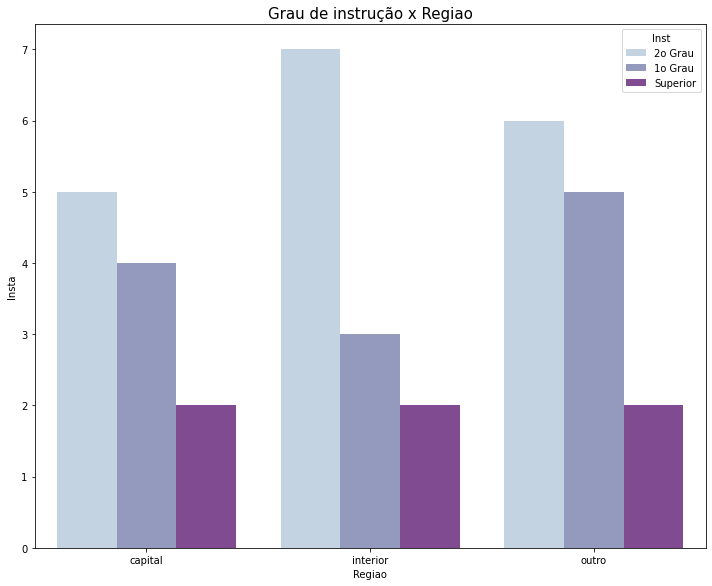

In [111]:
#criando uma figure, axes
fig, ax = plt.subplots(figsize=(10,8))
#criando o gráfico de barras 
sns.barplot(x = reset_df['Regiao'] ,y = reset_df['Insta'], hue = reset_df['Inst'], ax=ax, data=df_inst_salario,palette='BuPu')
#otimizar espaço da figure
fig.tight_layout();
#adicionando título
ax.set_title('Grau de instrução x Regiao', fontdict={'fontsize':15});

In [16]:
# Qual a média de salário e idade das pessoas casadas?
salary_age_married =  milsa.query('`Est.civil` == "casado" ')
salary_age_married[['Anos','Salario']].mean()

df = pd.DataFrame(salary_age_married[['Anos','Salario']].mean())
df.rename(columns={0: 'Média'}, inplace = True)
df.style.format({'Média':'{:.2F}'})


,Média
Anos,35.15
Salario,12.12


In [17]:
# Funcionario com maior salario
milsa.query('Salario == Salario.max()')

,Est.civil,Inst,Filhos,Salario,Anos,Regiao
Funcionario,,,,,,
36,casado,Superior,3.0,23.3,42,interior


In [18]:
milsa.query('Anos == Anos.min()')

,Est.civil,Inst,Filhos,Salario,Anos,Regiao
Funcionario,,,,,,
4,solteiro,2o Grau,0.0,5.73,20,outro


In [98]:
milsa.query('Anos < 30 ')['Inst'].value_counts()

1o Grau     3
2o Grau     3
Superior    2
Name: Inst, dtype: int64

In [19]:
# Quem são os funcionários que possuem no máximo 35 anos, são da capital e tem instrução de 2o grau?

milsa.query('0 < Anos <= 35 & Regiao == "capital" & Inst == "2o Grau"')

,Est.civil,Inst,Filhos,Salario,Anos,Regiao
Funcionario,,,,,,
9,casado,2o Grau,1.0,7.59,34,capital
17,casado,2o Grau,1.0,9.77,31,capital
22,solteiro,2o Grau,0.0,11.59,34,capital
30,casado,2o Grau,2.0,15.99,35,capital


In [20]:
# Faça uma correlação entre todos os atributos. (Dica: mapeie os atributos qualitativos para atributos quantitativos. Ex: solteiro: 1, casado: 2, etc)
milsa.head()

,Est.civil,Inst,Filhos,Salario,Anos,Regiao
Funcionario,,,,,,
1,solteiro,1o Grau,0.0,4.00,26,interior
2,casado,1o Grau,1.0,4.56,32,capital
3,casado,1o Grau,2.0,5.25,36,capital
4,solteiro,2o Grau,0.0,5.73,20,outro
5,solteiro,1o Grau,0.0,6.26,40,outro


In [21]:
milsa_copy = milsa.copy()

In [22]:
funcao_inst = lambda x: 1 if x == '1o Grau' else 2 if x == '2o Grau' else 3 if x == 'Superior' else 0
funcao_reg = lambda x: 1 if x == 'capital' else 2 if x == 'interior' else 3 if x == 'outro' else 0
funcao_estciv = lambda x: 1 if x == 'casado' else 2 if x == 'solteiro' else 0

In [23]:
milsa_copy['Est.civil'] = milsa_copy['Est.civil'].apply(funcao_estciv)


In [24]:
milsa_copy['Regiao'] = milsa_copy['Regiao'].apply(funcao_reg)

In [25]:
milsa_copy['Inst'] = milsa_copy['Inst'].apply(funcao_inst)
milsa_copy['Inst'].unique()

array([1, 2, 3])

In [26]:
milsa_copy.corr()

,Est.civil,Inst,Filhos,Salario,Anos,Regiao
Est.civil,1.000000,-0.108465,-0.664838,-0.247488,-0.095369,0.213498
Inst,-0.108465,1.000000,0.114723,0.639350,-0.216011,-0.033082
Filhos,-0.664838,0.114723,1.000000,0.375551,0.422981,-0.161297
Salario,-0.247488,0.639350,0.375551,1.000000,0.363362,-0.093966
Anos,-0.095369,-0.216011,0.422981,0.363362,1.000000,-0.077851
Regiao,0.213498,-0.033082,-0.161297,-0.093966,-0.077851,1.000000


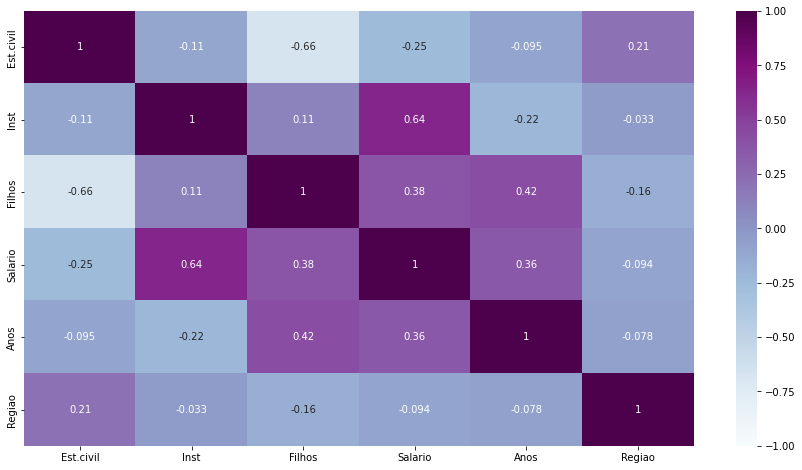

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(milsa_copy.corr(), vmin=-1.0, vmax=1.0, cmap='BuPu', annot=True)
print()

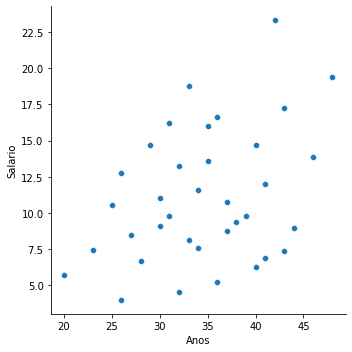

In [126]:
# Anos x Salario
sns.relplot (x="Anos", y="Salario",
            height=5, data=milsa);

In [119]:
milsa.query('Anos < 30')['Inst'].value_counts()

2o Grau     5
1o Grau     3
Superior    2
Name: Inst, dtype: int64

In [120]:
milsa.query('Anos >= 30')['Inst'].value_counts()

2o Grau     15
1o Grau      9
Superior     4
Name: Inst, dtype: int64